<a href="https://colab.research.google.com/github/praveenraghuvanshi1512/EVA4/blob/Session-9/Session-9/Assignment-9/EVA_4_S9_Praveen_Raghuvanshi_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Steps Summary

In [0]:
# 1. Mount google drive
# 2. Set the directory path of google drive
# 3. Import all modules and libraries
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test

### 1. Mount google drive

In [2]:
# Load data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Set the directory path of google drive

In [0]:
import sys
%load_ext autoreload
%autoreload 2
sys.path.append('/content/drive/My Drive/eva-4/assignment-9')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/models')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/gradcam')
sys.path.append('/content/drive/My Drive/eva-4/assignment-9/sampleimages')

In [4]:
cd '/content/drive/My Drive/eva-4/assignment-9'

/content/drive/My Drive/eva-4/assignment-9


In [5]:
ls

augmentation.py  gradcam/  outputs/      S9_functions.py  utils.py
data/            models/   __pycache__/  sampleimages/


### 3. Import all modules and libraries

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import numpy as np
from torchvision.utils import make_grid

### 4. Set Device

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


###  5. Import all the functions

In [0]:
from model import Net, ResNet, resnet18
from S9_functions import myfunc, transformations, loadcifar10dataset, getclasses, display, train, test, imshow, loadimage, saveimage, getoptimizer
from gradcam import GradCAM, GradCAMpp, applygradcam
from gradcam_utils import Normalize, visualize_cam

###  6. Load Transformations

In [9]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-01_f0cep
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-01_f0cep
     |████████████████████████████████| 634kB 42.3MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=1fcd770d6e4ab8d826cfb9bfc539b2371185da74e2c7b48dc2882ca5075759b2
  Stored in directory: /tmp/pip-ephem-wheel-cache-x269v71o/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=f62435bb5f7b00509866b7111cb232184028c9f614a9f353cb483199095314c1
  Stored in directory: /tmp/pip-ephem-wheel-cache-x269v71o/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built albumentations imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Found existing installation: albu

In [0]:
transform_train, transform_test = transformations()

###  7. Load Dataset

In [10]:
trainset, trainloader, testset, testloader = loadcifar10dataset(transform_train, transform_test)
print(trainloader)

Files already downloaded and verified
Files already downloaded and verified


###  8. Load Classes

In [11]:
classes = getclasses()
print(classes)

('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


### 9. Display sample images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  cat   car truck  frog


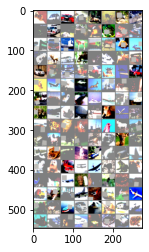

In [12]:
display(4, trainloader, classes)

### 10. Load Resnet18 Model


In [13]:
print("Building Model")
net = resnet18()

Building Model


In [14]:
# Display Model Summary
!pip install torchsummary
from torchsummary import summary

model = net.to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

### 11. Define loss function and optimizer


In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = getoptimizer(net)

### 12. Run Train and Test

In [16]:
for epoch in range(60):
    train(net, trainloader, device, optimizer, criterion, epoch)
    test(net, testloader, device, criterion, epoch)

print("Training completed")


Epoch: 0
 [================================================================>]  Step: 94ms | Tot: 55s202ms | Train >> Loss: 1.735 | Acc: 36.540% (18270/50000) 391/391 
 [================================================================>]  Step: 63ms | Tot: 3s498ms | Test >> Loss: 1.502 | Acc: 43.900% (4390/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 97ms | Tot: 55s652ms | Train >> Loss: 1.383 | Acc: 49.762% (24881/50000) 391/391 
 [================================================================>]  Step: 67ms | Tot: 3s550ms | Test >> Loss: 1.364 | Acc: 53.600% (5360/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 96ms | Tot: 55s785ms | Train >> Loss: 1.177 | Acc: 57.728% (28864/50000) 391/391 
 [================================================================>]  Step: 64ms | Tot: 3s581ms | Test >> Loss: 0.943 | Acc: 66.370% (6637/10000) 79/79 

Epoch: 3
 [=========================

### 13. Grad-CAM


##### Image 1: Car with a girl

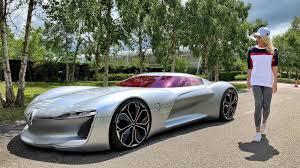

In [17]:
# Load Image
imagename = 'car.jpg'
imagedir = '/content/drive/My Drive/eva-4/assignment-9/sampleimages'
pil_img = loadimage(imagedir, imagename)
pil_img

In [18]:
imgs = applygradcam(pil_img, model, imagedir, imagename)

saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


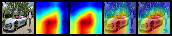

In [21]:
pilimg = saveimage(imgs, '/content/drive/My Drive/eva-4/assignment-9/outputs', imagename)
pilimg

##### Image-2: Dog

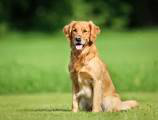

In [22]:
# Load Image
imagename2 = 'dog.jpg'
pil_img2 = loadimage('/content/drive/My Drive/eva-4/assignment-9/sampleimages', imagename2)
pil_img2

In [23]:
imgs2 = applygradcam(pil_img2, model, imagedir, imagename2)

saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


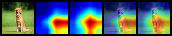

In [24]:
pilimg2 = saveimage(imgs2, '/content/drive/My Drive/eva-4/assignment-9/outputs', imagename2)
pilimg2

### 14. Analysis
- No of Epochs : 60
- Batch size : 128
- Best Train Acc: 96.46%
- Best Test  Acc: 87.29%
- No Model changes in Resnet18
- Extra things done
  - Optimizer: Adam
  - Learning rate: 0.001
  - Image augmentation - Albumentations
    - Train
      - HorizontalFlip(p=1)
      - Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
      - Cutout(num_holes=1, max_h_size=12, max_w_size=12, fill_value=[0.4914, 0.4822, 0.4465], always_apply=False, p=0.5)
      - RandomContrast(limit=0.2)
      - RandomBrightness(limit=0.2)
      - ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1,rotate_limit=15, border_mode=cv2.BORDER_REFLECT_101)
    - Test
      - Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
- Train and test acc were converging till epoch 12 and started to diverge post that.
- There has been a continous increase in train accuracy
- Test accuracy is fluctuating
- Gap between train and test acc is 9.17 in last epoch